In [1]:
from matplotlib import pyplot as plt
import b2plot as bp
# plt.style.use('belle2_modern')
plt.style.use('belle2')


# basic setup of the notebook

import numpy as np
import pandas as pd

# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit,cost

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

# display iminuit version
import iminuit
print("iminuit version:", iminuit.__version__)

For optimal usage set `plt.style.use('belle2')`
iminuit version: 2.15.2


In [2]:
# plt.style.available
# plt.style.use('belle2_modern')
px = 1/plt.rcParams['figure.dpi']
plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

In [3]:
import os
import pandas as pd
from pandas import HDFStore
from os import path
from yaml import safe_load

from hist.get_data import get_data, get_data_in_np
from hist.bkg_stack import generic_ntuple, get_data_in_module
from read_yaml_to_dict import read_yaml_to_dict
from src.sample_name import sample_name
from src.combine_cuts import combine_cuts
print(os.getcwd())

Welcome to JupyROOT 6.26/04
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'belle2', 'belle2_modern', 'belle2_serif', 'belle2_wg1', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
/home/jykim/workspace/DRAW/read_yaml_to_dict.py
/home/jykim/workspace/DRAW
/home/jykim/workspace/DRAW


In [4]:
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from iminuit.util import describe
from matplotlib import pyplot as plt
import numpy as np
from numba_stats import norm, crystalball
from numba_stats import truncnorm, truncexpon, norm, expon
# from scipy.stats import truncnorm

In [5]:
def crystalball_pdf(x, beta, m, loc, scale):
    
    return crystalball.pdf(x, beta, m, loc, scale)

In [6]:
def signal_crystalball(x, s, beta, m, loc, scale):
    func = s * crystalball.pdf(x, beta, m, loc, scale)
    return s, func

In [7]:
def extended_bin_signal_crystalball(x, s, beta, m, loc, scale):
    func = s * crystalball.pdf(x, beta, m, loc, scale)
    return func

In [8]:
def gauss_signal_crystalball(x, s1, s2, beta, m, loc, scale, mu, sigma):
    func =s1 * crystalball.pdf(x, beta, m, loc, scale) + s2*truncnorm.pdf(x,*xr, mu, sigma)
    return s1+s2, func

# Total generic data

In [11]:
location='lab_ssd'
option = 'train_v2_extraction_pi0veto'
sample_info = read_yaml_to_dict("samples")

In [12]:
sample_loc=sample_name(option=option, location=location, sample_info=sample_info) 
#sample_loc=sample_name(option='pid_0_5_no_signal', location=location) 
print(sample_loc )

{'ccbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ccbar/train_v2_extraction_pi0veto_ccbar_recon_output_0*.root', 'charged': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/charged/train_v2_extraction_pi0veto_charged_recon_output_0*.root', 'mixed': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/mixed/train_v2_extraction_pi0veto_mixed_recon_output_0*.root', 'uubar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/uubar/train_v2_extraction_pi0veto_uubar_recon_output_0*.root', 'ddbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ddbar/train_v2_extraction_pi0veto_ddbar_recon_output_0*.root', 'ssbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ssbar/train_v2_extraction_pi0veto_ssbar_recon_output_0*.root', 'taupair': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/taupair/train_v2_extraction_pi0veto_taupair_recon_output_0*.root'}


In [13]:
List = ['phi', 'antiKstar', 'rho', 'omega']
extract_variables = "plot_variables"

plot_variables = read_yaml_to_dict(extract_variables )

In [14]:
for mode in List:
    if mode == 'phi':
        plot_variables = read_yaml_to_dict(extract_variables )
        plot_variables['vars'].append('Pi0_Prob')
        plot_variables['vars'].append('Eta_Prob')
        pd_phi = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
    elif mode == 'antiKstar':
        plot_variables = read_yaml_to_dict(extract_variables )
        plot_variables['vars'].append('Pi0_Prob')
        plot_variables['vars'].append('Eta_Prob')
        pd_antiKstar = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
    elif mode == 'rho':
        plot_variables = read_yaml_to_dict(extract_variables )
        plot_variables['vars'].append('Pi0_Prob')
        plot_variables['vars'].append('Eta_Prob')
        pd_rho = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
    elif mode == 'omega':
        plot_variables = read_yaml_to_dict(extract_variables )
        plot_variables['vars'].append('Pi0_Prob')
        plot_variables['vars'].append('Eta_Prob')
        pd_omega = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)

['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_clusterSecondMoment', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal', 'Pi0_Prob', 'Eta_Prob', 'Phi_InvM', 'D0_cosHel_0']
['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_clusterSecondMoment', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal', 'Pi0_Prob', 'Eta_Prob', 'antiKstar_InvM', 'D0_cosHel_0']
['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_clusterSecondMoment', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal', 'Pi0_Prob', 'Eta_Prob', 'Rho_InvM', 'D0_cosHel_0']
['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_clusterSecondMoment', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal', 'Pi0_Prob', 'Eta_Prob', 'D0_cosHel_2', 'Omega_InvM']


In [15]:
pd_phi.describe()

,D0_M,Dstarp_Q,D0_cosHel_0,Dstarp_CMS_p,gamma_E,gamma_clusterSecondMoment,__ncandidates__,__experiment__,__run__,__event__,Dstarp_isSignal,D0_isSignal,Pi0_Prob,Eta_Prob,Phi_InvM
count,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.0,3406.0,3.406000e+03,3291.0,3319.0,3406.000000,3406.000000,3406.000000
mean,1.821262,0.005911,-0.006606,3.296804,1.284997,0.985875,1.006459,1003.0,0.0,1.386807e+08,0.0,0.0,0.528155,0.590299,1.019834
std,0.071495,0.000328,0.726402,0.593452,0.696577,0.200850,0.080121,0.0,0.0,7.679093e+07,0.0,0.0,0.303659,0.293068,0.004211
min,1.665286,0.005330,-0.999806,2.420412,0.299974,0.195312,1.000000,1003.0,0.0,1.094510e+05,0.0,0.0,0.000033,0.000310,1.008520
25%,1.789040,0.005643,-0.744849,2.801510,0.663940,0.859375,1.000000,1003.0,0.0,7.326165e+07,0.0,0.0,0.266883,0.338360,1.017596
50%,1.828965,0.005890,-0.044229,3.210119,1.220360,0.976562,1.000000,1003.0,0.0,1.454581e+08,0.0,0.0,0.592234,0.618833,1.019675
75%,1.850412,0.006186,0.732923,3.745967,1.790727,1.093750,1.000000,1003.0,0.0,2.024968e+08,0.0,0.0,0.812338,0.867132,1.021974
max,2.064540,0.006530,0.999930,4.847180,3.670579,1.484375,2.000000,1003.0,0.0,3.188082e+08,0.0,0.0,0.899849,0.998694,1.030492


In [16]:
pd_rho.describe()

,D0_M,Dstarp_Q,D0_cosHel_0,Dstarp_CMS_p,gamma_E,gamma_clusterSecondMoment,__ncandidates__,__experiment__,__run__,__event__,Dstarp_isSignal,D0_isSignal,Pi0_Prob,Eta_Prob,Rho_InvM
count,36296.000000,36296.000000,36296.000000,36296.000000,36296.000000,36296.000000,36296.000000,36296.0,36296.0,3.629600e+04,33518.0,33842.000000,3.629600e+04,36280.000000,36296.000000
mean,1.825293,0.005923,-0.001419,3.332002,1.595384,0.982294,1.027606,1003.0,0.0,1.377066e+08,0.0,0.000059,4.802652e-01,0.553885,0.780877
std,0.095027,0.000335,0.683680,0.488227,0.930330,0.195184,0.168814,0.0,0.0,8.200556e+07,0.0,0.007687,3.194263e-01,0.311937,0.082203
min,1.665003,0.005330,-0.999986,2.720005,0.298135,0.039062,1.000000,1003.0,0.0,4.280000e+02,0.0,0.000000,4.094405e-07,0.000049,0.625264
25%,1.753661,0.005643,-0.683956,2.928890,0.704710,0.859375,1.000000,1003.0,0.0,6.540302e+07,0.0,0.000000,1.527533e-01,0.277299,0.715985
50%,1.825460,0.005920,-0.003466,3.211049,1.574091,0.976562,1.000000,1003.0,0.0,1.378872e+08,0.0,0.000000,5.285198e-01,0.558884,0.783941
75%,1.866294,0.006202,0.682690,3.639264,2.324294,1.093750,1.000000,1003.0,0.0,2.069303e+08,0.0,0.000000,7.956067e-01,0.860081,0.848477
max,2.064874,0.006530,0.999983,6.481069,6.019554,1.484375,3.000000,1003.0,0.0,3.209958e+08,0.0,1.000000,8.999141e-01,0.999809,0.925236


In [17]:
pd_antiKstar.describe()

,D0_M,Dstarp_Q,D0_cosHel_0,Dstarp_CMS_p,gamma_E,gamma_clusterSecondMoment,__ncandidates__,__experiment__,__run__,__event__,Dstarp_isSignal,D0_isSignal,Pi0_Prob,Eta_Prob,antiKstar_InvM
count,93546.000000,93546.000000,93546.000000,93546.000000,93546.000000,93546.000000,93546.000000,93546.0,93546.0,9.354600e+04,90475.0,91385.000000,9.354600e+04,93530.000000,93546.000000
mean,1.820655,0.005909,0.215311,3.273546,1.455593,0.983963,1.014196,1003.0,0.0,1.383391e+08,0.0,0.000153,4.991111e-01,0.554009,0.901401
std,0.060712,0.000322,0.649754,0.622036,0.745387,0.189651,0.119110,0.0,0.0,7.666803e+07,0.0,0.012376,3.105313e-01,0.299618,0.031450
min,1.665000,0.005330,-0.999984,2.300045,0.297139,0.039062,1.000000,1003.0,0.0,7.247000e+03,0.0,0.000000,3.298534e-07,0.000027,0.835551
25%,1.796319,0.005645,-0.439697,2.753380,0.836512,0.859375,1.000000,1003.0,0.0,7.241445e+07,0.0,0.000000,2.028510e-01,0.295086,0.879222
50%,1.829987,0.005901,0.458373,3.206421,1.406356,0.976562,1.000000,1003.0,0.0,1.417630e+08,0.0,0.000000,5.467818e-01,0.558617,0.903710
75%,1.849203,0.006168,0.752736,3.735993,1.973722,1.093750,1.000000,1003.0,0.0,2.047164e+08,0.0,0.000000,8.017246e-01,0.841038,0.926329
max,2.064939,0.006530,0.999997,5.328585,4.793233,1.484375,3.000000,1003.0,0.0,3.209833e+08,0.0,1.000000,8.999398e-01,0.999810,0.955550


In [18]:
pd_omega.describe()


,D0_M,Dstarp_Q,D0_cosHel_0,Dstarp_CMS_p,gamma_E,gamma_clusterSecondMoment,__ncandidates__,__experiment__,__run__,__event__,Dstarp_isSignal,D0_isSignal,Pi0_Prob,Eta_Prob,D0_cosHel_2,Omega_InvM
count,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.0,6820.0,6.820000e+03,4056.0,4102.000000,6820.000000,6820.000000,6820.000000,6820.000000
mean,1.843114,0.005941,0.019095,3.179179,1.557797,0.983052,1.097947,1003.0,0.0,1.346408e+08,0.0,0.001463,0.500327,0.675270,-0.107231,0.782667
std,0.109703,0.000343,0.605571,0.419015,0.950768,0.205006,0.325522,0.0,0.0,8.405243e+07,0.0,0.038222,0.319454,0.281397,0.615405,0.008424
min,1.665013,0.005330,-0.999979,2.700296,0.291833,0.078125,1.000000,1003.0,0.0,5.707000e+03,0.0,0.000000,0.000015,0.000556,-0.999916,0.767650
25%,1.748184,0.005649,-0.516090,2.857459,0.572552,0.859375,1.000000,1003.0,0.0,6.021693e+07,0.0,0.000000,0.177680,0.430387,-0.682059,0.775666
50%,1.833452,0.005952,0.015100,3.062934,1.606233,0.976562,1.000000,1003.0,0.0,1.314481e+08,0.0,0.000000,0.572679,0.765373,-0.178218,0.782648
75%,1.931242,0.006236,0.580481,3.386682,2.339284,1.093750,1.000000,1003.0,0.0,2.043026e+08,0.0,0.000000,0.808581,0.932840,0.437690,0.789765
max,2.064965,0.006530,0.999744,5.700234,4.815456,1.484375,4.000000,1003.0,0.0,3.208505e+08,0.0,1.000000,0.899849,0.999495,0.999583,0.797648


In [19]:
def crystalball_pdf(x, beta, m, loc, scale):
    
    return crystalball.pdf(x, beta, m, loc, scale)

In [20]:
def same_mu_extended_gauss_crystalball(x, s1, s2, alpha, n, CB_sigma, mu, sigma):
    func = s1 * crystalball.pdf(x, alpha, n, mu, CB_sigma) + s2 * norm.pdf(x, mu, sigma)
#     return func
    return s1 + s2, func

In [225]:
def extended_two_crystalball(x, s1, s2, alpha1,alpha2, n1, CB1_sigma, CB1_mu, n2, CB2_sigma, CB2_mu):
    func = s1 * crystalball.pdf(x, alpha1, n1, CB1_mu, CB1_sigma) + s2 * crystalball.pdf(x, alpha2, n2, CB2_mu, CB2_sigma)
    return s1 + s2, func

In [226]:
def extended_two_crystalball_one_exp(x, s1, s2, s3, alpha1,alpha2, n1, CB1_sigma, CB1_mu, n2, CB2_sigma, CB2_mu, loc,tau):
    func = s1 * crystalball.pdf(x, alpha1, n1, CB1_mu, CB1_sigma) + s2 * crystalball.pdf(x, alpha2, n2, CB2_mu, CB2_sigma) +  s3 * expon.pdf(x, loc, tau)
    return s1 + s2 + s3, func

In [238]:
PDF = extended_two_crystalball
# PDF = extended_two_crystalball_one_exp

In [248]:
mode = 'phi'
# pd_phi = get_data(file=phi_file, tree='phi', base_filter=None,variables=variables)
dataset = pd_phi['D0_M']

In [249]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=1450,s2=300,alpha1=1.3,alpha2=1.26, n1=0.31,n2=54, CB1_sigma=0.015,CB2_sigma=0.02, CB1_mu=1.84,CB2_mu=1.67)

In [250]:
# m.limits["s1"]=(0,None)
# m.limits["s2"]=(0,None)
# m.limits["n1","n2"]=(0,None)

# m.limits["alpha1","alpha2"]=(0,3)
# m.limits["CB1_sigma"]=(0, 0.05)
# m.limits["CB2_sigma"]=(0, 0.04)
# # m.limits["tau"]=(0,None)
# # m.limits["loc"]=(None,2)

# # # m.limits["loc","mu"]=(1.84, 1.88)


# m.limits["CB1_mu"]=(1.70,1.90)
# m.limits["CB2_mu"]=(1.60,1.73)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -4.024e+07                 │             Nfcn = 1485              │
│ EDM = nan (Goal: 0.0002)         │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name      │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1        │  1.45e3   │    nan    │            │            │         │         │       │
│ 1 │ s2        │ -2.0048e7 │    nan    │            │            │         │         │       │
│ 2 │ alpha1    │ 2.8192e-1 │    nan    │            │            │         │         │       │
│ 3 │ alpha2    │   1.26    │    nan    │            │            │         │         │       │
│ 4 │ n1        │  3.1e-1   │    nan    │            │            │         │         │       │
│ 5 │ CB1_sigma │  1.5e-2   │    nan    │            │            │         │         │       │
│ 6 │ CB1_mu    │   1.84    │    nan    │            │            │         │         │       │
│ 7 │ n2        │   5.4e1   │    nan    │            │            │         │         │       │
│ 8 │ CB2_sigma │   2e-2    │    nan    │            │            │         │         │       │
│ 9 │ CB2_mu    │   1.67    │    nan    │            │            │         │         │       │
└───┴───────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────┐
│           │        s1        s2    alpha1    alpha2        n1 CB1_sigma    CB1_mu        n2 CB2_sigma    CB2_mu │
├───────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────┤
│        s1 │       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan │
│        s2 │       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan │
│    alpha1 │       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan │
│    alpha2 │       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan │
│        n1 │       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan │
│ CB1_sigma │       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan │
│    CB1_mu │       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan │
│        n2 │       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan │
│ CB2_sigma │       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan │
│    CB2_mu │       nan       nan       nan       nan       nan       nan       nan       nan       nan       nan │
└───────────┴─────────────────────────────────────────────────────────────────────────────────────────────────────┘

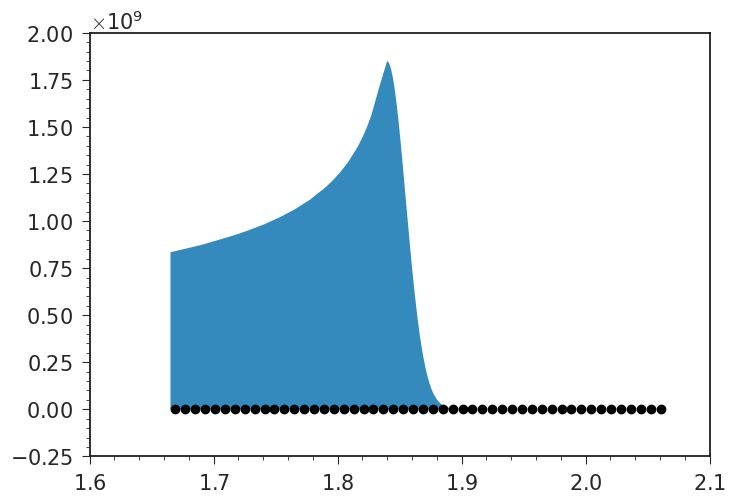

In [251]:
COST.visualize(m.values)

In [243]:
m.interactive()

In [214]:
general_plot_location='/home/jykim/nas/plots/genericMC/vector/700fb_inv_vector_after_pi0veto.png'

this_plot_location = general_plot_location.replace("vector",mode)

px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

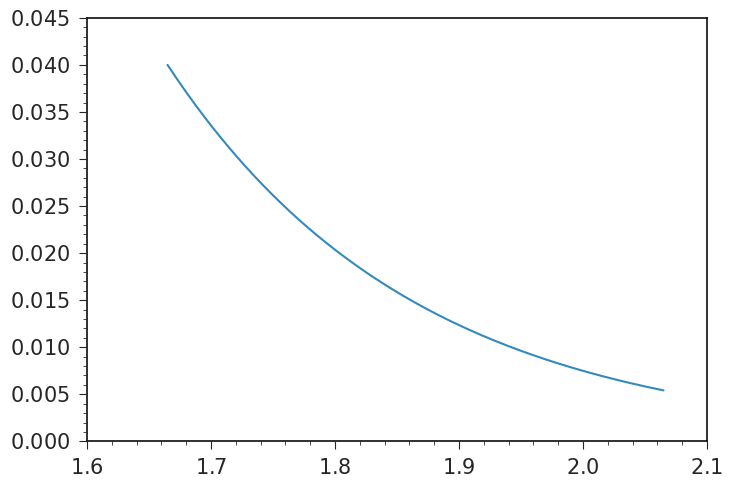

In [215]:
plt.plot(xm, expon.pdf(xm, 1.665,0.2) * dx[0] ,label="Fit(CB+Gauss)")


true entries = 3406
s1 + s2 = 1450.0 + -20047524.426003136 = -20046074.426003136


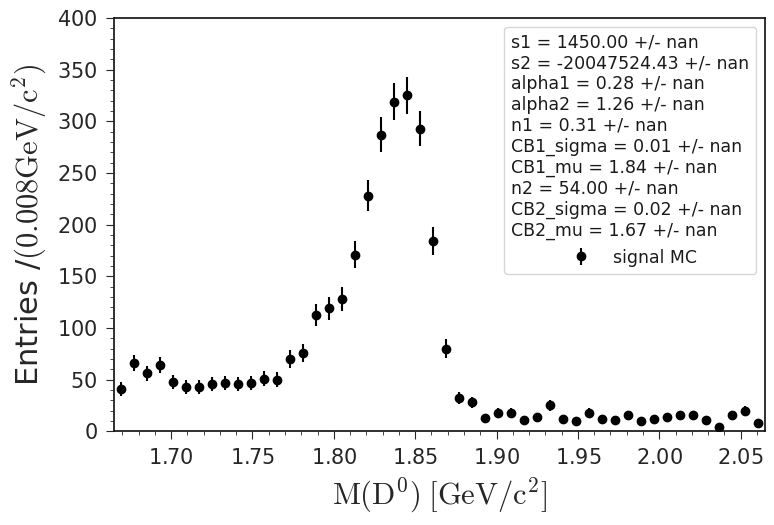

In [252]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2_modern')
xrange = (1.665,2.065,400)

xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, extended_two_crystalball(xm, *m.values)[1] * dx[0],label="Fit(CB+Gauss)")


# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")







# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

# Specific bkg

## D to phi pi0

In [9]:
def signal_crystalball(x, s, alpha, n, CB_mu, CB_sigma):
    func = s * crystalball.pdf(x,alpha, n, CB_mu, CB_sigma)
    return s, func

In [10]:
bkg_file = '/media/jykim/ssd_T5/storage/01_recon/phi/specific_bkg/train_v2_extraction_pi0veto_D2phipi0_mdst_1M.root'

In [11]:
variables=['D0_M']
base_filter = 'Pis_charge==1'
D_to_phi_pi0 = get_data(file=bkg_file, tree='phi', base_filter=base_filter,variables=variables)


In [12]:
dataset = D_to_phi_pi0
dataset = dataset[(dataset['D0_M'] < 1.93)  ]['D0_M']

In [13]:
dataset.describe()

count    7909.000000
mean        1.820964
std         0.039838
min         1.665455
25%         1.805525
50%         1.831033
75%         1.847528
max         1.928345
Name: D0_M, dtype: float64

In [14]:
mode = 'phi'

In [15]:
PDF = signal_crystalball

In [16]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)


m = Minuit(COST, s=7900 ,alpha=0.51, n=119, CB_mu=1.84,CB_sigma=0.02)

In [17]:
m.limits["n"]=(0,500)

m.limits["alpha"]=(0,2)
m.limits["CB_sigma"]=(0, 0.4)

m.limits["CB_mu"]=(1.78,1.90)

m.limits["s"]=(0,None)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.573e+05                 │              Nfcn = 164              │
│ EDM = 0.00195 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s        │  7.91e3   │  0.09e3   │            │            │    0    │         │       │
│ 1 │ alpha    │   0.515   │   0.008   │            │            │    0    │    2    │       │
│ 2 │ n        │119.64502644│0.00000013 │            │            │    0    │   500   │       │
│ 3 │ CB_mu    │  1.8397   │  0.0005   │            │            │  1.78   │   1.9   │       │
│ 4 │ CB_sigma │ 19.06e-3  │  0.17e-3  │            │            │    0    │   0.4   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         s     alpha         n     CB_mu  CB_sigma │
├──────────┼───────────────────────────────────────────────────┤
│        s │  7.89e+03   -0.0254 -7.11e-08  0.000569 -0.000734 │
│    alpha │   -0.0254   6.5e-05 -6.57e-10 -2.74e-06  2.98e-07 │
│        n │ -7.11e-08 -6.57e-10  1.64e-14  2.46e-11  2.42e-13 │
│    CB_mu │  0.000569 -2.74e-06  2.46e-11  2.07e-07 -4.55e-08 │
│ CB_sigma │ -0.000734  2.98e-07  2.42e-13 -4.55e-08  3.06e-08 │
└──────────┴───────────────────────────────────────────────────┘

In [18]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.573e+05                 │             Nfcn = 1411              │
│ EDM = 0.00195 (Goal: 0.0002)     │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s        │  7.91e3   │  0.09e3   │  -0.09e3   │   0.09e3   │    0    │         │       │
│ 1 │ alpha    │   0.515   │   0.008   │   -0.008   │   0.013    │    0    │    2    │       │
│ 2 │ n        │119.64502644│0.00000013 │-0.00000013 │ 0.00000013 │    0    │   500   │       │
│ 3 │ CB_mu    │  1.8397   │  0.0005   │  -0.0005   │   0.0005   │  1.78   │   1.9   │       │
│ 4 │ CB_sigma │ 19.06e-3  │  0.17e-3  │  -0.17e-3  │  0.17e-3   │    0    │   0.4   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           s           │         alpha         │           n           │         CB_mu         │       CB_sigma        │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │    -90    │    90     │  -0.008   │   0.013   │ -0.13e-6  │  0.13e-6  │  -0.5e-3  │  0.5e-3   │ -0.17e-3  │  0.17e-3  │
│  Valid   │   False   │   False   │   False   │   True    │   False   │   False   │   True    │   False   │   False   │   False   │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────┐
│          │         s     alpha         n     CB_mu  CB_sigma │
├──────────┼───────────────────────────────────────────────────┤
│        s │  7.89e+03   -0.0254 -7.11e-08  0.000569 -0.000734 │
│    alpha │   -0.0254   6.5e-05 -6.57e-10 -2.74e-06  2.98e-07 │
│        n │ -7.11e-08 -6.57e-10  1.64e-14  2.46e-11  2.42e-13 │
│    CB_mu │  0.000569 -2.74e-06  2.46e-11  2.07e-07 -4.55e-08 │
│ CB_sigma │ -0.000734  2.98e-07  2.42e-13 -4.55e-08  3.06e-08 │
└──────────┴───────────────────────────────────────────────────┘

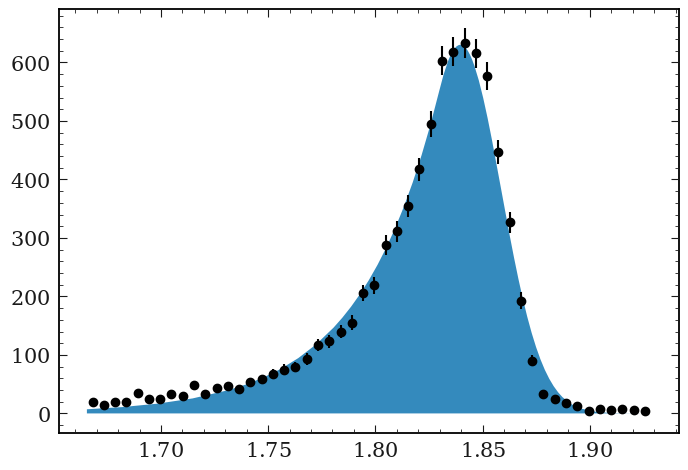

In [19]:
COST.visualize(m.values)

In [20]:
plt.style.use('belle2_serif')
this_plot_location=('test')

true entries = 7909


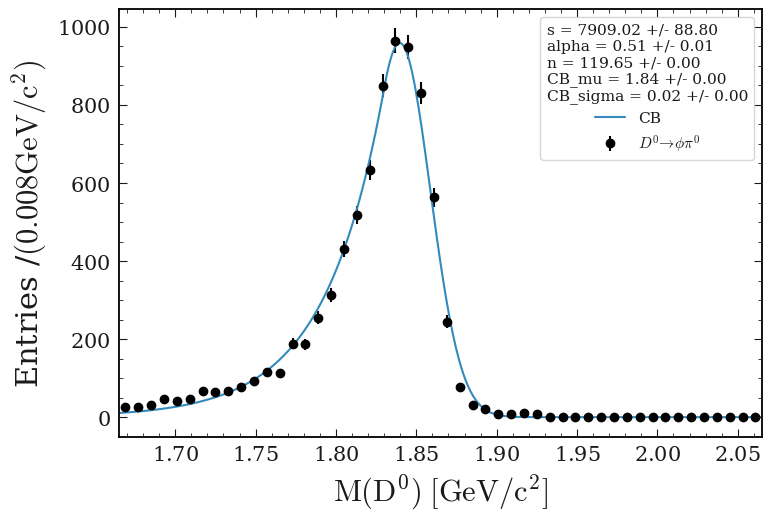

In [21]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"$D^0 \to \phi \pi^0$")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


# plt.plot(xm, crystalball.pdf(xm, *m.values) * len(dataset) * dx[0],label="fit(CB)")


plt.plot(xm, signal_crystalball(xm, *m.values)[1] * dx[0] ,label="CB")


# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

## combinatorial

In [22]:
from scipy.stats import expon

In [23]:
def expon_function(x, s, exp_loc, exp_scale):
    func = s * expon.pdf(x,exp_loc, exp_scale)
    return s, func

In [96]:
def gauss_expon_function(x, s1, s2, mu,sigma,exp_loc, exp_scale):
    func = s1 * norm.pdf(x, mu, sigma) + s2 * expon.pdf(x,exp_loc, exp_scale)
    return s1+s2, func

In [97]:
bkg_file = '/media/jykim/ssd_T5/storage/01_recon/topoanaWrapperForCharm/train_v2_phi/topoana.root'


In [98]:
variables=['D0_M']
base_filter = 'Pis_charge==1 && iCascDcyBrP_Dst_0!=0'
D_to_phi_pi0 = get_data(file=bkg_file, tree='phi', base_filter=base_filter,variables=variables)


(array([118.,  60.,  72.,  80.,  68.,  36.,  41.,  34.,  36.,  30.]),
 array([1.66528618, 1.70521156, 1.74513693, 1.7850623 , 1.82498767,
        1.86491305, 1.90483842, 1.94476379, 1.98468916, 2.02461454,
        2.06453991]),
 <BarContainer object of 10 artists>)

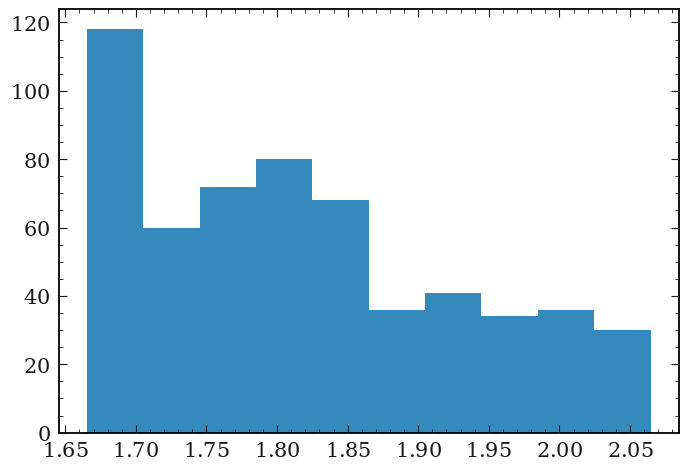

In [99]:
dataset = D_to_phi_pi0
plt.hist(dataset)
# dataset = dataset[(dataset['D0_M'] < 1.93)  ]['D0_M']

In [100]:
dataset.describe()

,D0_M
count,575.000000
mean,1.819797
std,0.111393
min,1.665286
25%,1.724483
50%,1.804246
75%,1.900641
max,2.064540


In [101]:
mode = 'phi'

In [187]:
# PDF = expon_function
PDF = gauss_expon_function

In [206]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
# del m
m = Minuit(COST, s1=100,s2=330 , exp_loc = 1.650, exp_scale = 0.2, mu = 1.67, sigma=0.02)
# m = Minuit(COST, s=7900 ,alpha=0.51, n=119, CB_mu=1.84,CB_sigma=0.02)

In [207]:
# m.limits["n"]=(0,500)

# m.limits["alpha"]=(0,2)
# m.limits["CB_sigma"]=(0, 0.4)

# m.limits["CB_mu"]=(1.78,1.90)

m.limits["exp_scale"]=(0, 1)
m.limits["exp_loc"]=(1.0, 1.665)
m.limits["s1","s2"]=(0,None)
m.limits["sigma"] = (0, 0.3)
m.limits["mu"] = (1.5, 1.75)


m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -7153                      │              Nfcn = 222              │
│ EDM = 9.36e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name      │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1        │    0.0    │    0.7    │            │            │    0    │         │       │
│ 1 │ s2        │    575    │     2     │            │            │    0    │         │       │
│ 2 │ mu        │   1.71    │   0.23    │            │            │   1.5   │  1.75   │       │
│ 3 │ sigma     │   0.02    │   0.21    │            │            │    0    │   0.3   │       │
│ 4 │ exp_loc   │  1.66500  │  0.00014  │            │            │    1    │  1.665  │       │
│ 5 │ exp_scale │   0.155   │   0.006   │            │            │    0    │    1    │       │
└───┴───────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────────┬─────────────────────────────────────────────────────────────┐
│           │        s1        s2        mu     sigma   exp_loc exp_scale │
├───────────┼─────────────────────────────────────────────────────────────┤
│        s1 │  1.38e-06 -3.22e-07  2.22e-06 -2.55e-06  6.57e-16  9.11e-09 │
│        s2 │ -3.22e-07      3.97 -5.17e-07  5.94e-07 -2.78e-16 -2.12e-09 │
│        mu │  2.22e-06 -5.17e-07    0.0345 -4.08e-06  1.05e-15  1.46e-08 │
│     sigma │ -2.55e-06  5.94e-07 -4.08e-06     0.024 -1.22e-15 -1.68e-08 │
│   exp_loc │  6.57e-16 -2.78e-16  1.05e-15 -1.22e-15  5.67e-14  1.27e-12 │
│ exp_scale │  9.11e-09 -2.12e-09  1.46e-08 -1.68e-08  1.27e-12  4.17e-05 │
└───────────┴─────────────────────────────────────────────────────────────┘

In [208]:
m.interactive()

In [209]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -7153                      │             Nfcn = 1762              │
│ EDM = 9.36e-07 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name      │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1        │  0.4e-6   │700916.0e-6│  -0.4e-6   │700916.0e-6 │    0    │         │       │
│ 1 │ s2        │   575.0   │    2.0    │   -23.7    │    24.3    │    0    │         │       │
│ 2 │ mu        │   1.71    │   0.23    │   -0.21    │    0.23    │   1.5   │  1.75   │       │
│ 3 │ sigma     │   0.02    │   0.21    │   -0.21    │    0.28    │    0    │   0.3   │       │
│ 4 │ exp_loc   │1.66499999989│0.00013457118│-0.00013461797│0.00000000010│    1    │  1.665  │       │
│ 5 │ exp_scale │   0.155   │   0.006   │   -0.006   │   0.007    │    0    │    1    │       │
└───┴───────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │          mu           │         sigma         │        exp_loc        │       exp_scale       │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.4e-6  │700916.0e-6│    -24    │    24     │   -0.21   │   0.23    │   -0.21   │   0.28    │-134617.97e-9│  0.10e-9  │  -0.006   │   0.007   │
│  Valid   │   True    │   False   │   True    │   True    │   True    │   False   │   False   │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   True    │   False   │   False   │   False   │   True    │   False   │   False   │   True    │   False   │   True    │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   True    │   False   │   False   │   False   │   True    │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────────┬─────────────────────────────────────────────────────────────┐
│           │        s1        s2        mu     sigma   exp_loc exp_scale │
├───────────┼─────────────────────────────────────────────────────────────┤
│        s1 │  1.38e-06 -3.22e-07  2.22e-06 -2.55e-06  6.57e-16  9.11e-09 │
│        s2 │ -3.22e-07      3.97 -5.17e-07  5.94e-07 -2.78e-16 -2.12e-09 │
│        mu │  2.22e-06 -5.17e-07    0.0345 -4.08e-06  1.05e-15  1.46e-08 │
│     sigma │ -2.55e-06  5.94e-07 -4.08e-06     0.024 -1.22e-15 -1.68e-08 │
│   exp_loc │  6.57e-16 -2.78e-16  1.05e-15 -1.22e-15  5.67e-14  1.27e-12 │
│ exp_scale │  9.11e-09 -2.12e-09  1.46e-08 -1.68e-08  1.27e-12  4.17e-05 │
└───────────┴─────────

In [210]:
m.values

<ValueView s1=3.6457236135718774e-07 s2=575.0210796241756 mu=1.7086132961850897 sigma=0.021548088449485314 exp_loc=1.664999999894665 exp_scale=0.1547984993144262>

In [211]:
COST.visualize(m.values)

ValueError: visualize is not implemented for multi-dimensional data

In [212]:
plt.style.use('belle2_serif')
this_plot_location=('test')

true entries = 575


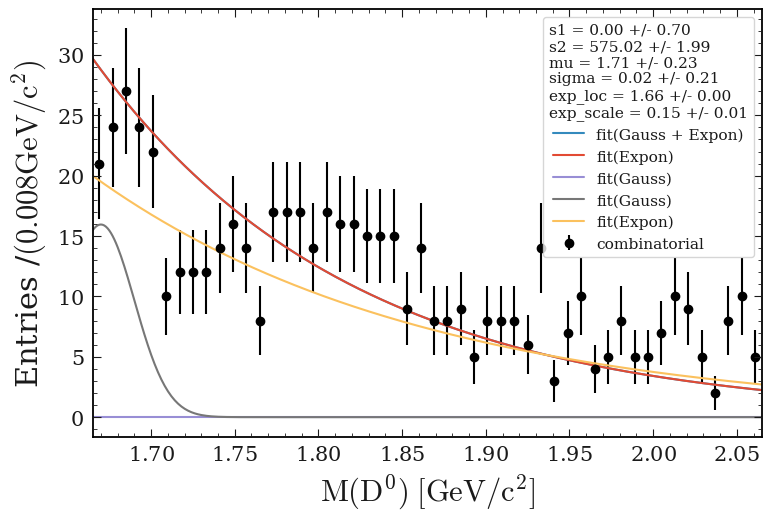

In [215]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"combinatorial")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


plt.plot(xm, gauss_expon_function(xm, *m.values)[1] * dx[0],label="fit(Gauss + Expon)")
plt.plot(xm, m.values["s2"] * expon.pdf(xm, m.values['exp_loc'], m.values['exp_scale']) * dx[0],label="fit(Expon)")
plt.plot(xm, m.values["s1"] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="fit(Gauss)")
plt.plot(xm, 100 * norm.pdf(xm, 1.67, 0.02) * dx[0],label="fit(Gauss)")
plt.plot(xm, 500 * expon.pdf(xm, 1.665, 0.2) * dx[0],label="fit(Expon)")


# plt.plot(xm, signal_crystalball(xm, *m.values)[1] * dx[0] ,label="CB")


# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
# ax.set_ylim(1e-1,1e5)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

# D to phi gamma

In [253]:
def expon_two_signal_crystalball(x, s,b1,b2,bkg_alpha, bkg_n, bkg_mu, bkg_sigma,sig_alpha, sig_n, sig_mu, sig_sigma,exp_scale):
    func = b1 * crystalball.pdf(x,bkg_alpha, bkg_n, bkg_mu, bkg_sigma) + s * crystalball.pdf(x,sig_alpha, sig_n, sig_mu, sig_sigma) + b2 * expon.pdf(x, 1.665, exp_scale) 
    return s + b1 + b2, func

In [254]:
bkg_file = '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/all/train_v2_extraction_pi0veto_all_sig_bkg.root'


In [255]:
variables=['D0_M']
base_filter = 'Pis_charge==1' 
D_to_phi_gamma_bkg = get_data(file=bkg_file, tree='phi', base_filter=base_filter,variables=variables)

,D0_M
count,1994.000000
mean,1.827383
std,0.068325
min,1.665286
25%,1.799237
50%,1.835034
75%,1.854516
max,2.064540


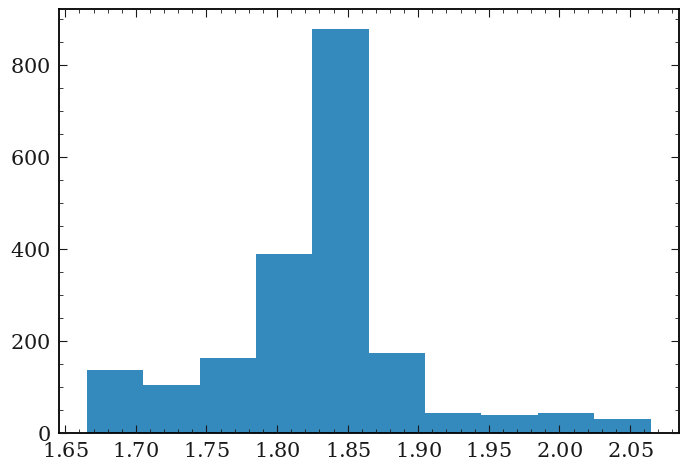

In [256]:
dataset = D_to_phi_gamma_bkg
plt.hist(dataset)
dataset.describe()

In [257]:
PDF = expon_two_signal_crystalball

In [258]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
# del m

m = Minuit(COST, s=200, b1=1500, b2=500, bkg_alpha=0.51, bkg_n=119, bkg_mu=1.84, bkg_sigma=0.02 ,sig_alpha=0.949, sig_n=70, sig_mu=1.86, sig_sigma=0.14, exp_scale=0.15)


In [259]:
m.limits['s','b1','b2']=(0,None)

m.limits["bkg_n"]=(0,500)
m.limits["bkg_alpha"]=(0,2)
m.limits["bkg_sigma"]=(0, 0.4)
m.limits["bkg_mu"]=(1.78,1.90)


m.limits["sig_n"]=(0,None)
m.limits["sig_alpha"]=(0,5)
m.limits["sig_sigma"]=(0, 0.1)
m.limits["sig_mu"]=(1.80,1.90)

m.limits["exp_scale"]=(0, 1)
# m.limits["exp_loc"]=(1.0, 1.665)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -3.216e+04                 │              Nfcn = 409              │
│ EDM = 375 (Goal: 0.0002)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name      │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s         │  0.20e3   │  0.18e3   │            │            │    0    │         │       │
│ 1 │ b1        │  1.50e3   │  0.15e3   │            │            │    0    │         │       │
│ 2 │ b2        │    500    │    23     │            │            │    0    │         │       │
│ 3 │ bkg_alpha │   0.51    │   0.03    │            │            │    0    │    2    │       │
│ 4 │ bkg_n     │    120    │    50     │            │            │    0    │   500   │       │
│ 5 │ bkg_mu    │  1.8400   │  0.0023   │            │            │  1.78   │   1.9   │       │
│ 6 │ bkg_sigma │   0.020   │   0.006   │            │            │    0    │   0.4   │       │
│ 7 │ sig_alpha │   0.95    │   0.29    │            │            │    0    │    5    │       │
│ 8 │ sig_n     │    70     │    70     │            │            │    0    │         │       │
│ 9 │ sig_mu    │   1.860   │   0.031   │            │            │   1.8   │   1.9   │       │
│ 10│ sig_sigma │   0.015   │   0.023   │            │            │    0    │   0.1   │       │
│ 11│ exp_scale │   0.150   │   0.008   │            │            │    0    │    1    │       │
└───┴───────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│           │         s        b1        b2 bkg_alpha     bkg_n    bkg_mu bkg_sigma sig_alpha     sig_n    sig_mu sig_sigma exp_scale │
├───────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│         s │  3.41e+04 -2.69e+04       835      4.25  2.52e+03    -0.405      1.16     -24.3  3.11e+03     -6.12     -4.47      1.13 │
│        b1 │ -2.69e+04  2.26e+04      -832     -3.43 -2.02e+03     0.321    -0.922      19.5 -2.47e+03      4.87      3.56    -0.889 │
│        b2 │       835      -832       544     0.164      79.6  -0.00968     0.029    -0.813      80.4    -0.162    -0.124    0.0226 │
│ bkg_alpha │      4.25     -3.43     0.164  0.000923     0.284 -5.48e-05  0.000159  -0.00366     0.379 -0.000807 -0.000597  0.000142 │
│     bkg_n │  2.52e+03 -2.02e+03      79.6     0.284  3.03e+03   -0.0306    0.0908     -1.95       234     -0.47    -0.346    0.0843 │
│    bkg_mu │    -0.405     0.321  -0.00968 -5.48e-05   -0.0306  5.42e-06  -1.4e-05  0.000261   -0.0378  7.32e-05  5.38e-05 -1.36e-05 │
│ bkg_sigma │      1.16    -0.922     0.029  0.000159    0.0908  -1.4e-05  4.14e-05 -0.000893     0.108 -0.000215 -0.000158  3.98e-05 │
│ sig_alpha │     -24.3      19.5    -0.813  -0.00366     -1.95  0.000261 -0.000893    0.0825     -4.58   0.00448   0.00361 -0.000869 │
│     sig_n │  3.11e+03 -2.47e+03      80.4     0.379   

In [260]:
m.minos()

RuntimeError: Function minimum is not valid: <FMin algorithm='Migrad' edm=374.8005992435673 edm_goal=0.0002 errordef=1.0 fval=-32164.789292989575 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=False hesse_failed=False is_above_max_edm=True is_valid=False nfcn=409 ngrad=0 reduced_chi2=nan time=0.06724378699800582>

In [261]:
m.interactive()

In [262]:
plt.style.use('belle2_serif')
this_plot_location=('test')

true entries = 1994


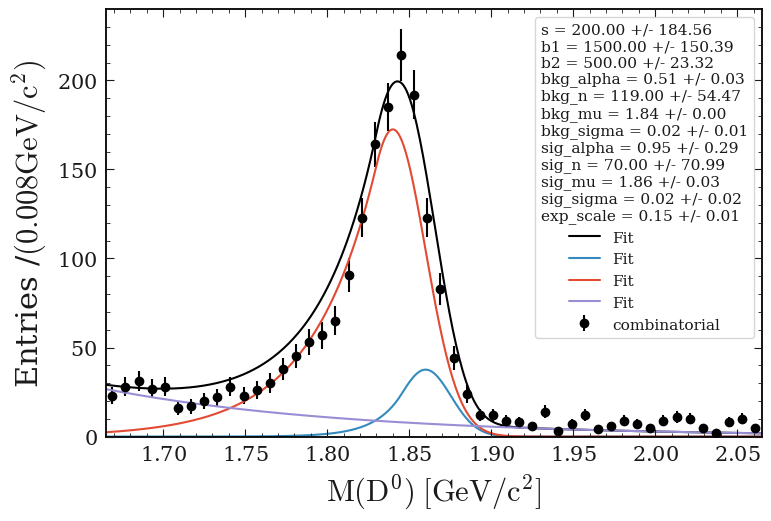

In [271]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


# import b2plot as bp
# plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label=r"combinatorial")

# plt.hist(dataset,density=True)

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

# plt.plot(xm, crystalball_pdf(xm, alpha=1.006, n=9.2, CB_mu=1.86272, CB_sigma=0.01294) * len(dataset) * dx[0],label="fixed(CB)")


plt.plot(xm, expon_two_signal_crystalball(xm, *m.values)[1] * dx[0],label="Fit",color='black')
plt.plot(xm, m.values['s'] * crystalball.pdf(xm, m.values['sig_alpha'], m.values['sig_n'], m.values['sig_mu'], m.values['sig_sigma']) * dx[0],label="Fit")
plt.plot(xm, m.values['b1'] * crystalball.pdf(xm, m.values['bkg_alpha'], m.values['bkg_n'], m.values['bkg_mu'], m.values['bkg_sigma']) * dx[0],label="Fit")
plt.plot(xm, m.values['b2'] * expon.pdf(xm, 1.665,m.values['exp_scale']) * dx[0],label="Fit")



# plt.plot(xm, m.values["s2"] * expon.pdf(xm, m.values['exp_loc'], m.values['exp_scale']) * dx[0],label="fit(Expon)")
# plt.plot(xm, m.values["s1"] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="fit(Gauss)")
# plt.plot(xm, 100 * norm.pdf(xm, 1.67, 0.02) * dx[0],label="fit(Gauss)")
# plt.plot(xm, 500 * expon.pdf(xm, 1.665, 0.2) * dx[0],label="fit(Expon)")


# plt.plot(xm, signal_crystalball(xm, *m.values)[1] * dx[0] ,label="CB")


# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='x-small')

ax = plt.gca()
ax.set_ylim(0,None)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

# plt.yscale("log")

print("true entries = " + str(len(dataset)))
# print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

# After pi0 veto

## Extended unbinned MLE

In [9]:
from hist.get_data import get_data_in_np

In [10]:
def extended_gauss_crystalball(x, s1, s2, alpha, n, CB_mu, CB_sigma, mu, sigma):
    func = s1 * crystalball.pdf(x, alpha, n, CB_mu, CB_sigma) + s2 * norm.pdf(x, mu, sigma)
#     return func
    return s1 + s2, func

In [11]:
def same_mu_extended_gauss_crystalball(x, s1, s2, alpha, n, CB_sigma, mu, sigma):
    func = s1 * crystalball.pdf(x, alpha, n, mu, CB_sigma) + s2 * norm.pdf(x, mu, sigma)
#     return func
    return s1 + s2, func

In [12]:
general_file = '/media/jykim/ssd_T5/storage/01_recon/vector/v2_extraction_expert_E_0_3_signalMC_recon_mdst_vector.root'

In [13]:
variables=['D0_M']

In [14]:
phi_file = general_file.replace("vector","phi")
rho_file = general_file.replace("vector","rho")
antiKstar_file = general_file.replace("vector","antiKstar")
omega_file = general_file.replace("vector","omega")

In [15]:
base_filter = 'Pi0_Prob<0.9'

In [16]:
half_1M_1_phi = get_data_in_np(file=phi_file, tree='phi', base_filter=base_filter,variables=variables)
half_1M_1_rho = get_data_in_np(file=rho_file, tree='rho', base_filter=base_filter,variables=variables)
half_1M_1_antiKstar = get_data_in_np(file=antiKstar_file, tree='antiKstar', base_filter=base_filter,variables=variables)
half_1M_1_omega = get_data_in_np(file=omega_file, tree='omega', base_filter=base_filter,variables=variables)

In [17]:
df_describe = pd.DataFrame(half_1M_1_phi)
df_describe.describe()


,D0_M
count,38310.000000
mean,1.858386
std,0.021628
min,1.666544
25%,1.849702
50%,1.861035
75%,1.870583
max,2.064014


In [18]:
PDF = same_mu_extended_gauss_crystalball

### phi

In [19]:
mode = 'phi'
dataset = half_1M_1_phi['D0_M']

In [20]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=35000,s2=3000, alpha=1, n=9, CB_sigma=0.05, mu=1.86, sigma=0.05)

In [21]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,50)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -9.305e+05                 │              Nfcn = 280              │
│ EDM = 0.000132 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  37.45e3  │  0.20e3   │            │            │    0    │         │       │
│ 1 │ s2       │    860    │    70     │            │            │    0    │         │       │
│ 2 │ alpha    │   1.006   │   0.025   │            │            │    0    │         │       │
│ 3 │ n        │    9.2    │    1.1    │            │            │    0    │   50    │       │
│ 4 │ CB_sigma │ 12.94e-3  │  0.10e-3  │            │            │    0    │   0.1   │       │
│ 5 │ mu       │  1.86272  │  0.00012  │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0689   │  0.0033   │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  4.15e+04 -3.68e+03    0.0233     -5.82   0.00199  0.000154    0.0821 │
│       s2 │ -3.68e+03  4.54e+03    -0.162      8.36  -0.00219  0.000334    -0.076 │
│    alpha │    0.0233    -0.162  0.000615   -0.0229   1.5e-06 -1.93e-06 -2.65e-05 │
│        n │     -5.82      8.36   -0.0229       1.2 -3.21e-05  5.04e-05   0.00187 │
│ CB_sigma │   0.00199  -0.00219   1.5e-06 -3.21e-05  9.97e-09  -7.3e-09  3.28e-08 │
│       mu │  0.000154  0.000334 -1.93e-06  5.04e-05  -7.3e-09  1.38e-08  3.54e-08 │
│    sigma │    0.0821    -0.076 -2.65e-05   0.00187  3.28e-08  3.54e-08  1.08e-05 │
└──────────┴───────────────────────────────────────────────────────────────────────┘

In [22]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -9.305e+05                 │             Nfcn = 1335              │
│ EDM = 0.000132 (Goal: 0.0002)    │            time = 0.5 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  37.45e3  │  0.20e3   │  -0.20e3   │   0.20e3   │    0    │         │       │
│ 1 │ s2       │    860    │    70     │    -70     │     70     │    0    │         │       │
│ 2 │ alpha    │   1.006   │   0.025   │   -0.024   │   0.025    │    0    │         │       │
│ 3 │ n        │    9.2    │    1.1    │    -1.0    │    1.3     │    0    │   50    │       │
│ 4 │ CB_sigma │ 12.94e-3  │  0.10e-3  │  -0.10e-3  │  0.10e-3   │    0    │   0.1   │       │
│ 5 │ mu       │  1.86272  │  0.00012  │  -0.00012  │  0.00012   │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0689   │  0.0033   │  -0.0034   │   0.0032   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │         alpha         │           n           │       CB_sigma        │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.2e3   │   0.2e3   │    -70    │    70     │  -0.024   │   0.025   │   -1.0    │    1.3    │  -0.1e-3  │  0.1e-3   │ -0.12e-3  │  0.12e-3  │  -0.0034  │  0.0032   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  4.15e+04 -3.68e+03    0.0233     -5.82   0.00199  0.000154    0.0821 │
│       s2 │ -3.68e+03  4.54e+03    -0.162      8.36  -0.00219  0.000334  

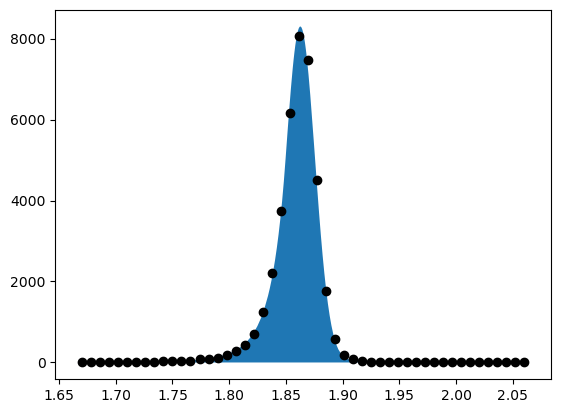

In [23]:
COST.visualize(m.values)

In [24]:
# general_plot_location = '/media/jykim/ssd_T5/storage/PLOTS/vector/half_1M_1_vector_after_pi0veto.png'
general_plot_location='/home/jykim/nas/plots/signalMC/vector/half_1M_1_vector_after_pi0veto.png'

In [25]:
this_plot_location = general_plot_location.replace("vector",mode)


In [26]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

For optimal usage set `plt.style.use('belle2')`
true entries = 38310
s1 + s2 = 37451.97740251737 + 858.80326862414 = 38310.78067114151


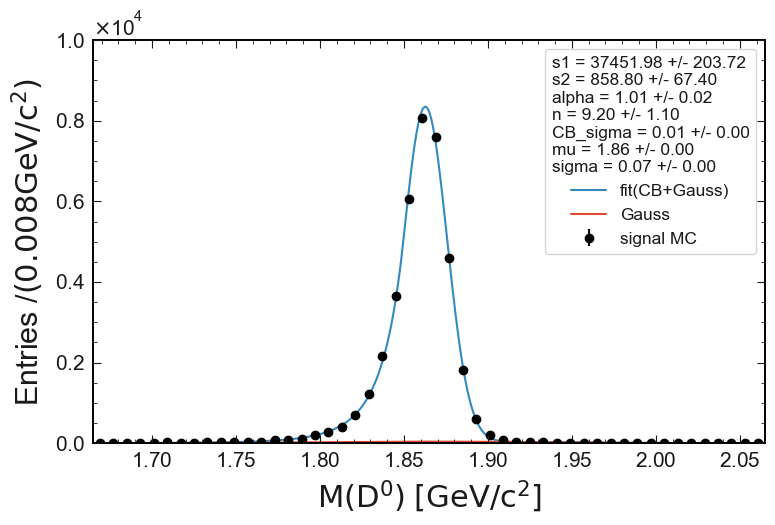

In [27]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+Gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

### rho

In [28]:
mode = 'rho'
dataset = half_1M_1_rho['D0_M']

In [29]:
df_describe = pd.DataFrame(half_1M_1_rho)
df_describe.describe()

,D0_M
count,65307.000000
mean,1.856203
std,0.029321
min,1.665198
25%,1.845809
50%,1.859820
75%,1.871211
max,2.064887


In [30]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=62000,s2=3000, alpha=1, n=9, CB_sigma=0.015, mu=1.86, sigma=0.05)

In [31]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,50)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.624e+06                 │              Nfcn = 329              │
│ EDM = 0.000103 (Goal: 0.0002)    │            time = 0.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  62.44e3  │  0.22e3   │            │            │    0    │         │       │
│ 1 │ s2       │  2.87e3   │  0.11e3   │            │            │    0    │         │       │
│ 2 │ alpha    │   1.010   │   0.017   │            │            │    0    │         │       │
│ 3 │ n        │    7.2    │    0.4    │            │            │    0    │   50    │       │
│ 4 │ CB_sigma │ 15.20e-3  │  0.09e-3  │            │            │    0    │   0.1   │       │
│ 5 │ mu       │  1.86188  │  0.00011  │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0855   │  0.0016   │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  4.98e+04 -8.64e+03    0.0295      1.37   0.00503  -0.00208    0.0671 │
│       s2 │ -8.64e+03  1.24e+04    -0.177      10.5  -0.00299  0.000471   -0.0608 │
│    alpha │    0.0295    -0.177  0.000303  -0.00606  1.04e-06 -1.23e-06 -3.35e-06 │
│        n │      1.37      10.5  -0.00606      0.19  -1.4e-05   1.8e-05  0.000184 │
│ CB_sigma │   0.00503  -0.00299  1.04e-06  -1.4e-05  8.42e-09 -5.98e-09  2.02e-08 │
│       mu │  -0.00208  0.000471 -1.23e-06   1.8e-05 -5.98e-09  1.13e-08  2.49e-09 │
│    sigma │    0.0671   -0.0608 -3.35e-06  0.000184  2.02e-08  2.49e-09  2.64e-06 │
└──────────┴───────────────────────────────────────────────────────────────────────┘

In [32]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.624e+06                 │             Nfcn = 1728              │
│ EDM = 0.000103 (Goal: 0.0002)    │            time = 1.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  62.44e3  │  0.22e3   │  -0.27e3   │   0.27e3   │    0    │         │       │
│ 1 │ s2       │  2.87e3   │  0.11e3   │  -0.11e3   │   0.12e3   │    0    │         │       │
│ 2 │ alpha    │   1.010   │   0.017   │   -0.018   │   0.018    │    0    │         │       │
│ 3 │ n        │    7.2    │    0.4    │    -0.4    │    0.5     │    0    │   50    │       │
│ 4 │ CB_sigma │ 15.20e-3  │  0.09e-3  │  -0.09e-3  │  0.09e-3   │    0    │   0.1   │       │
│ 5 │ mu       │  1.86188  │  0.00011  │  -0.00011  │  0.00011   │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0855   │  0.0016   │  -0.0017   │   0.0016   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │         alpha         │           n           │       CB_sigma        │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.27e3  │  0.27e3   │  -0.11e3  │  0.12e3   │  -0.017   │   0.018   │   -0.4    │    0.5    │ -0.09e-3  │  0.09e-3  │ -0.11e-3  │  0.11e-3  │  -0.0017  │  0.0016   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  4.98e+04 -8.64e+03    0.0295      1.37   0.00503  -0.00208    0.0671 │
│       s2 │ -8.64e+03  1.24e+04    -0.177      10.5  -0.00299  0.000471  

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


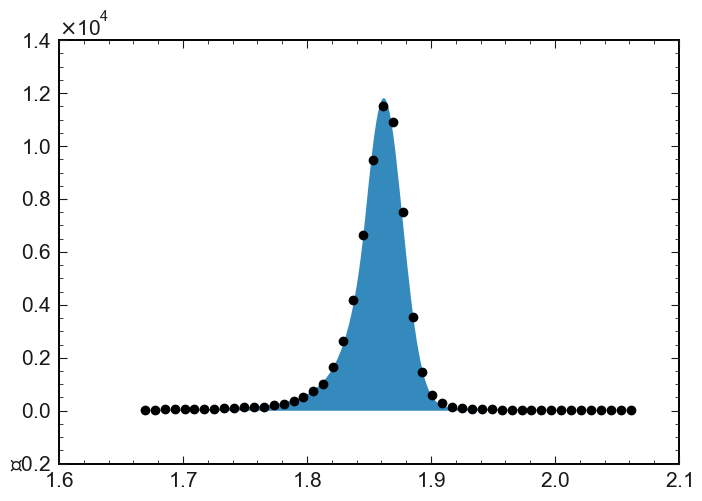

In [33]:
COST.visualize(m.values)

In [34]:
this_plot_location = general_plot_location.replace("vector",mode)


In [35]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 65307
s1 + s2 = 62437.18933740196 + 2867.783642763026 = 65304.97298016498


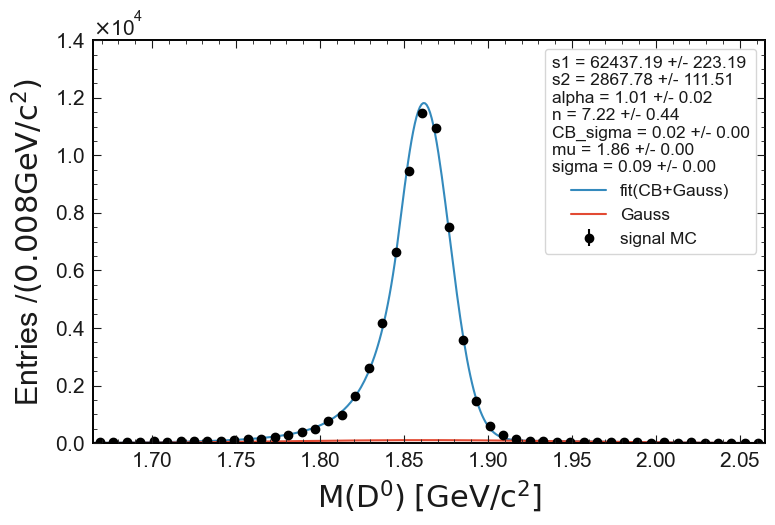

In [36]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+Gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

### antiKstar

In [37]:
mode = 'antiKstar'
dataset = half_1M_1_antiKstar['D0_M']

In [38]:
df_describe = pd.DataFrame(half_1M_1_antiKstar)
df_describe.describe()

,D0_M
count,52256.000000
mean,1.857240
std,0.025157
min,1.667223
25%,1.847284
50%,1.860299
75%,1.870904
max,2.064459


In [39]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=50000,s2=3000, alpha=1, n=9, CB_sigma=0.015, mu=1.86, sigma=0.05)

In [40]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,50)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.287e+06                 │              Nfcn = 302              │
│ EDM = 5.42e-05 (Goal: 0.0002)    │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  50.62e3  │  0.24e3   │            │            │    0    │         │       │
│ 1 │ s2       │  1.64e3   │  0.09e3   │            │            │    0    │         │       │
│ 2 │ alpha    │   1.018   │   0.020   │            │            │    0    │         │       │
│ 3 │ n        │    8.9    │    0.8    │            │            │    0    │   50    │       │
│ 4 │ CB_sigma │ 14.54e-3  │  0.10e-3  │            │            │    0    │   0.1   │       │
│ 5 │ mu       │  1.86201  │  0.00011  │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0772   │  0.0021   │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  5.74e+04 -6.81e+03     0.153     -13.7   0.00261 -0.000195    0.0767 │
│       s2 │ -6.81e+03  8.45e+03    -0.153      13.7  -0.00261  0.000195   -0.0768 │
│    alpha │     0.153    -0.153  0.000379   -0.0115  1.21e-06 -1.45e-06 -5.63e-06 │
│        n │     -13.7      13.7   -0.0115      0.58  -2.1e-05  2.88e-05  0.000469 │
│ CB_sigma │   0.00261  -0.00261  1.21e-06  -2.1e-05  9.63e-09 -6.82e-09  3.26e-08 │
│       mu │ -0.000195  0.000195 -1.45e-06  2.88e-05 -6.82e-09  1.28e-08  4.94e-09 │
│    sigma │    0.0767   -0.0768 -5.63e-06  0.000469  3.26e-08  4.94e-09  4.52e-06 │
└──────────┴───────────────────────────────────────────────────────────────────────┘

In [41]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.287e+06                 │             Nfcn = 1675              │
│ EDM = 5.42e-05 (Goal: 0.0002)    │            time = 1.0 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  50.62e3  │  0.24e3   │  -0.24e3   │   0.24e3   │    0    │         │       │
│ 1 │ s2       │  1.64e3   │  0.09e3   │  -0.09e3   │   0.09e3   │    0    │         │       │
│ 2 │ alpha    │   1.018   │   0.020   │   -0.022   │   0.022    │    0    │         │       │
│ 3 │ n        │    8.9    │    0.8    │    -0.8    │    1.0     │    0    │   50    │       │
│ 4 │ CB_sigma │ 14.54e-3  │  0.10e-3  │  -0.10e-3  │  0.10e-3   │    0    │   0.1   │       │
│ 5 │ mu       │  1.86201  │  0.00011  │  -0.00012  │  0.00011   │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0772   │  0.0021   │  -0.0021   │   0.0021   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │         alpha         │           n           │       CB_sigma        │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.24e3  │  0.24e3   │    -90    │    90     │  -0.022   │   0.022   │   -0.8    │    1.0    │  -0.1e-3  │  0.1e-3   │ -0.12e-3  │  0.11e-3  │  -0.0021  │  0.0021   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   False   │   True    │   False   │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  5.74e+04 -6.81e+03     0.153     -13.7   0.00261 -0.000195    0.0767 │
│       s2 │ -6.81e+03  8.45e+03    -0.153      13.7  -0.00261  0.000195  

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


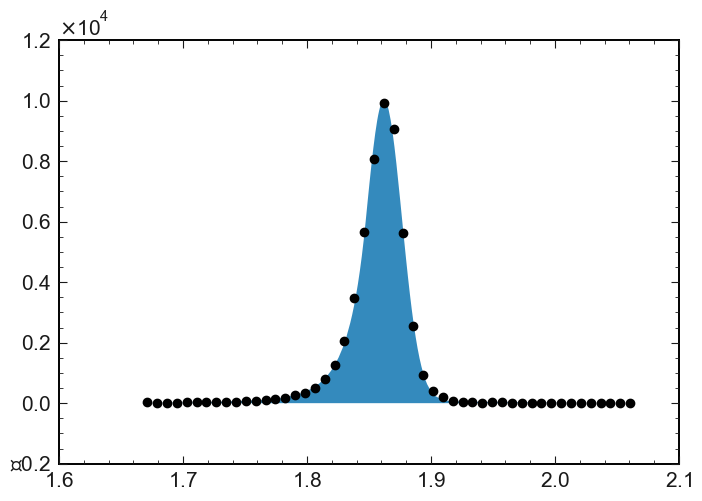

In [42]:
COST.visualize(m.values)

In [43]:
this_plot_location = general_plot_location.replace("vector",mode)


In [44]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 52256
s1 + s2 = 50618.34976844494 + 1636.360541471296 = 52254.710309916234


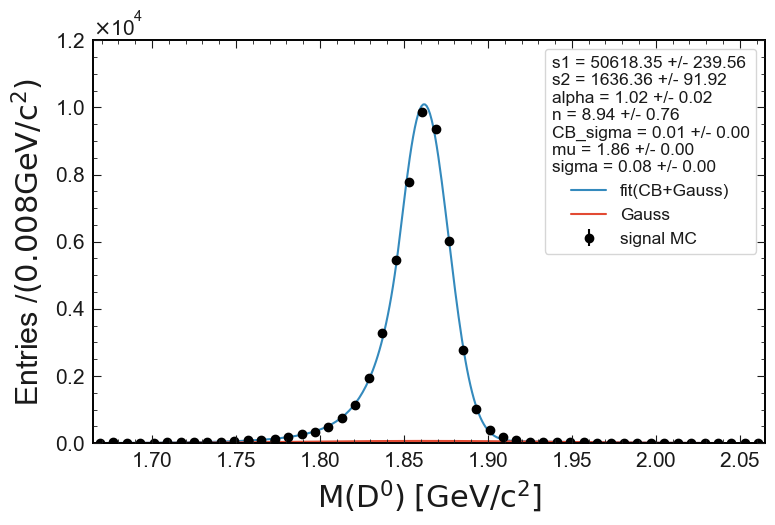

In [45]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+Gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))

### omega

In [46]:
mode = 'omega'
dataset = half_1M_1_omega['D0_M']

In [47]:
df_describe = pd.DataFrame(half_1M_1_omega)
df_describe.describe()

,D0_M
count,28012.000000
mean,1.855199
std,0.031490
min,1.665790
25%,1.842701
50%,1.858218
75%,1.871299
max,2.063333


In [48]:
COST = cost.ExtendedUnbinnedNLL(dataset, PDF)
m = Minuit(COST,  s1=25000,s2=3000, alpha=1, n=9, CB_sigma=0.015, mu=1.86, sigma=0.05)

In [49]:
m.limits["s1"]=(0,None)
m.limits["s2"]=(0,None)
m.limits["n"]=(0,50)

m.limits["alpha"]=(0,None)
m.limits["CB_sigma","sigma"]=(0, 0.1)
# m.limits["loc","mu"]=(1.84, 1.88)
m.limits["mu"]=(1.80,1.90)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -6.422e+05                 │              Nfcn = 293              │
│ EDM = 0.000519 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  26.24e3  │  0.18e3   │            │            │    0    │         │       │
│ 1 │ s2       │  1.77e3   │  0.10e3   │            │            │    0    │         │       │
│ 2 │ alpha    │   1.01    │   0.04    │            │            │    0    │         │       │
│ 3 │ n        │   12.3    │    3.5    │            │            │    0    │   50    │       │
│ 4 │ CB_sigma │ 17.40e-3  │  0.17e-3  │            │            │    0    │   0.1   │       │
│ 5 │ mu       │  1.86028  │  0.00019  │            │            │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0822   │  0.0020   │            │            │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  3.24e+04 -7.72e+03     0.737      -105   0.00494  -0.00084    0.0721 │
│       s2 │ -7.72e+03  9.71e+03    -0.798       114  -0.00547   0.00111   -0.0696 │
│    alpha │     0.737    -0.798   0.00153    -0.122  4.29e-06 -5.05e-06 -1.95e-05 │
│        n │      -105       114    -0.122      12.4 -0.000244  0.000288   0.00228 │
│ CB_sigma │   0.00494  -0.00547  4.29e-06 -0.000244  2.89e-08 -2.13e-08     3e-08 │
│       mu │  -0.00084   0.00111 -5.05e-06  0.000288 -2.13e-08  3.73e-08  2.14e-08 │
│    sigma │    0.0721   -0.0696 -1.95e-05   0.00228     3e-08  2.14e-08  4.08e-06 │
└──────────┴───────────────────────────────────────────────────────────────────────┘

In [50]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -6.422e+05                 │             Nfcn = 1963              │
│ EDM = 0.000519 (Goal: 0.0002)    │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s1       │  26.24e3  │  0.18e3   │  -0.18e3   │   0.18e3   │    0    │         │       │
│ 1 │ s2       │  1.77e3   │  0.10e3   │  -0.09e3   │   0.10e3   │    0    │         │       │
│ 2 │ alpha    │   1.007   │   0.039   │   -0.029   │   0.030    │    0    │         │       │
│ 3 │ n        │   12.3    │    3.5    │    -2.0    │    3.0     │    0    │   50    │       │
│ 4 │ CB_sigma │ 17.40e-3  │  0.17e-3  │  -0.16e-3  │  0.16e-3   │    0    │   0.1   │       │
│ 5 │ mu       │  1.86028  │  0.00019  │  -0.00019  │  0.00019   │   1.8   │   1.9   │       │
│ 6 │ sigma    │  0.0822   │  0.0020   │  -0.0020   │   0.0020   │    0    │   0.1   │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          s1           │          s2           │         alpha         │           n           │       CB_sigma        │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.18e3  │  0.18e3   │    -90    │    100    │  -0.029   │   0.030   │    -2     │     3     │ -0.16e-3  │  0.16e-3  │ -0.19e-3  │  0.19e-3  │  -0.002   │   0.002   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────┬───────────────────────────────────────────────────────────────────────┐
│          │        s1        s2     alpha         n  CB_sigma        mu     sigma │
├──────────┼───────────────────────────────────────────────────────────────────────┤
│       s1 │  3.24e+04 -7.72e+03     0.737      -105   0.00494  -0.00084    0.0721 │
│       s2 │ -7.72e+03  9.71e+03    -0.798       114  -0.00547   0.00111  

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


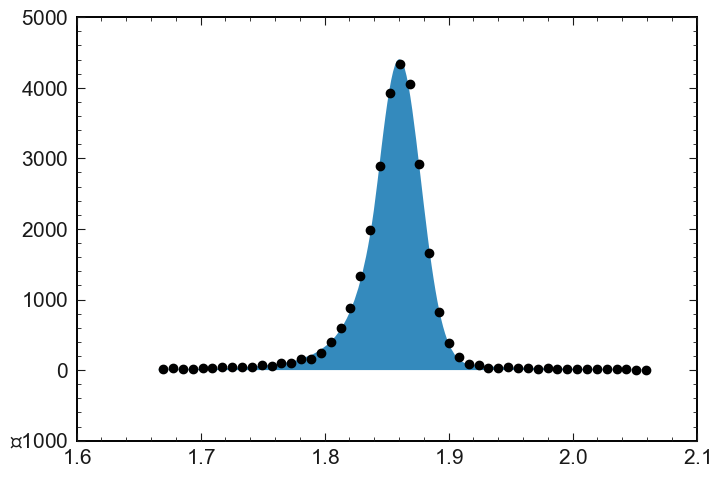

In [51]:
COST.visualize(m.values)

In [52]:
this_plot_location = general_plot_location.replace("vector",mode)


In [53]:
this_plot_location

'/home/jykim/nas/plots/signalMC/omega/half_1M_1_omega_after_pi0veto.png'

In [54]:
px = 1/plt.rcParams['figure.dpi']
fig = plt.figure(figsize=(576*px, 396*px))

<Figure size 576x396 with 0 Axes>

true entries = 28012
s1 + s2 = 26237.74121513926 + 1774.019844314625 = 28011.761059453886


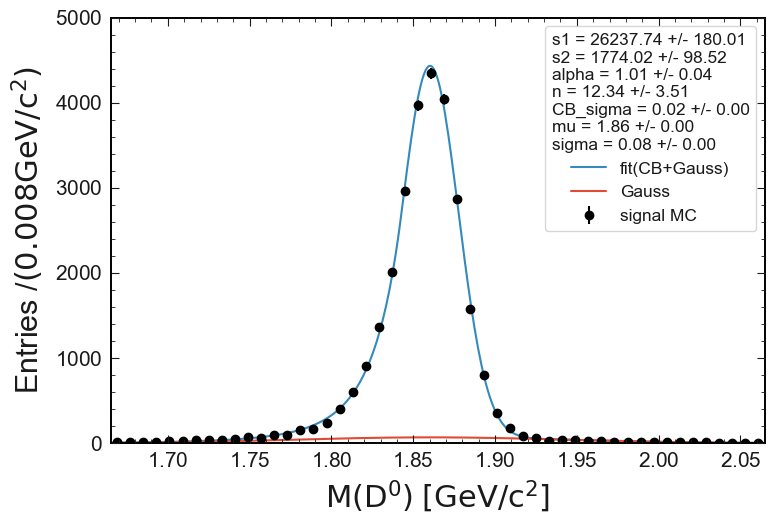

In [55]:
n, xe = np.histogram(dataset, bins=50, range=(1.665,2.065))
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])


import b2plot as bp
plt.style.use('belle2')
xrange = (1.665,2.065,400)
xm = np.linspace(*xrange)



plt.errorbar(cx, n, n ** 0.5, fmt="ok",label="signal MC")

# plt.plot(xm, extended_gauss_crystalball(xm, *[p.value for p in m.init_params])[1] * dx[0],
#          ls=":", label="init")

plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+Gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['loc'], m.values['scale'] ) * dx[0],label="CB")
# plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")

# plt.plot(xm, same_mu_extended_gauss_crystalball(xm, *m.values)[1] * dx[0],label="fit(CB+gauss)")
# plt.plot(xm, m.values['s1'] * crystalball.pdf(xm, m.values['beta'], m.values['m'], m.values['mu'], m.values['scale'] ) * dx[0],label="CB")
plt.plot(xm, m.values['s2'] * norm.pdf(xm, m.values['mu'], m.values['sigma']) * dx[0],label="Gauss")





# plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)
# plt.hist( df_antiKstar['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
title=[]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

ax = plt.gca()
ax.set_ylim(0,)
ax.set_xlim(1.665,2.065)
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
plt.savefig(this_plot_location)

print("true entries = " + str(len(dataset)))
print("s1 + s2 = " + str(m.values['s1']) + " + " + str(m.values['s2']) + " = " + str(m.values['s1'] + m.values['s2']))